In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# libraries needed for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score,mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from scipy.stats import pearsonr

In [ ]:
# Load the dataset
data = pd.read_csv("Housing.csv")

In [ ]:
# display the first five
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# check the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# Inspect for missing values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# check the data types
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# check the data shape
data.shape

(21613, 21)

In [ ]:

# get the descriptive statistics
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


1. Target Variable: price
Mean: The average price of houses is approximately $540,000.
Minimum and Maximum: The minimum price is about $75,000, while the maximum is $7.7 million, indicating a wide range of house prices. There are likely some high-end luxury homes that skew the maximum value.
Standard Deviation: The standard deviation of prices is large ($367,126), indicating that house prices vary significantly.
2. Bedrooms
Mean: The average number of bedrooms is about 3.37, which seems typical for a family-sized home.
Minimum and Maximum: Some homes have as few as 0 bedrooms, which could refer to small studios or listings with missing or incorrectly recorded data. The maximum of 33 bedrooms is unusual and suggests that there could be outliers (perhaps large, multi-unit properties or luxury estates).
Standard Deviation: A standard deviation of 0.93 indicates moderate variability in the number of bedrooms.
3. Bathrooms
Mean: The average number of bathrooms is about 2.11, which suggests most homes have between 2 and 3 bathrooms.
Minimum and Maximum: The minimum number of bathrooms is 0, which could refer to incorrect or outlier data points. The maximum of 8 bathrooms is likely an anomaly, associated with larger estates.
Standard Deviation: The standard deviation of 0.77 also suggests moderate variability in the number of bathrooms.
4. Square Footage: sqft_living and sqft_lot
sqft_living (Living Space)
Mean: The average living space is 2,079 square feet. This seems reasonable for a typical house in this dataset.
Minimum and Maximum: The smallest house has 290 sqft, which could be a very small unit or an incorrect value, while the largest house has 13,540 sqft of living space, indicating very large luxury properties.
Standard Deviation: A standard deviation of 918 indicates a large variation in the size of houses.
5. sqft_lot (Lot Size)
Mean: The average lot size is approximately 15,106 sqft, which is quite large and typical for suburban homes.
Minimum and Maximum: The minimum lot size is 500 sqft, which might correspond to very small apartment properties, while the largest lot is 1.65 million sqft, likely corresponding to large estates or properties with vast amounts of land.
6. Square Footage Above Ground and Basement: sqft_above, sqft_basement
sqft_above: The average size of above-ground living space is 1,788 sqft. The values for sqft_above are consistently higher than the basement area, indicating that most of the living space is above ground.
sqft_basement: The average basement area is only 291 sqft, indicating that many homes either do not have a basement or the basement space is relatively small compared to the main living areas. There are also some homes with no basement (0 sqft).
7. Other Observations:
sqft_living15 and sqft_lot15: These variables represent the living space and lot size of the home and the 15 nearest neighbors, respectively.

In [ ]:
# Check for duplicate rows
print(data.duplicated().sum())

0


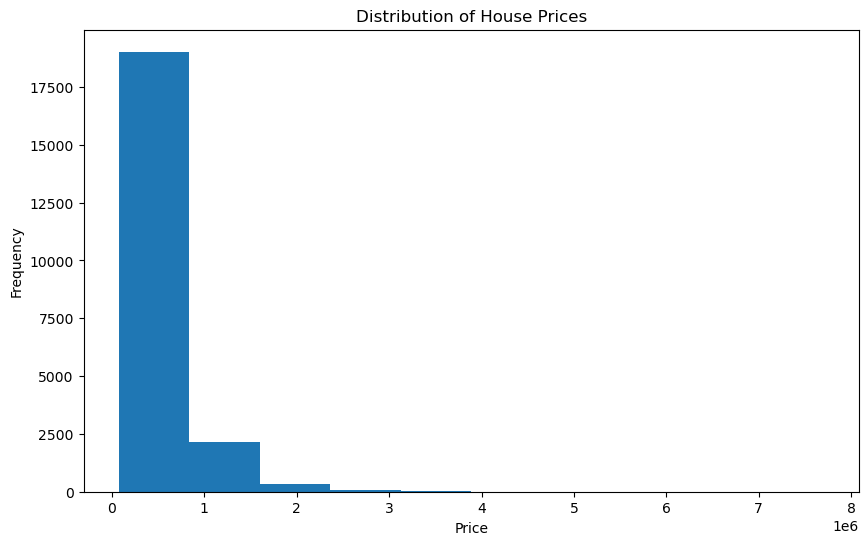

In [ ]:
# Plot distribution of 'price'
plt.figure(figsize=(10, 6))
plt.hist(data['price'])
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


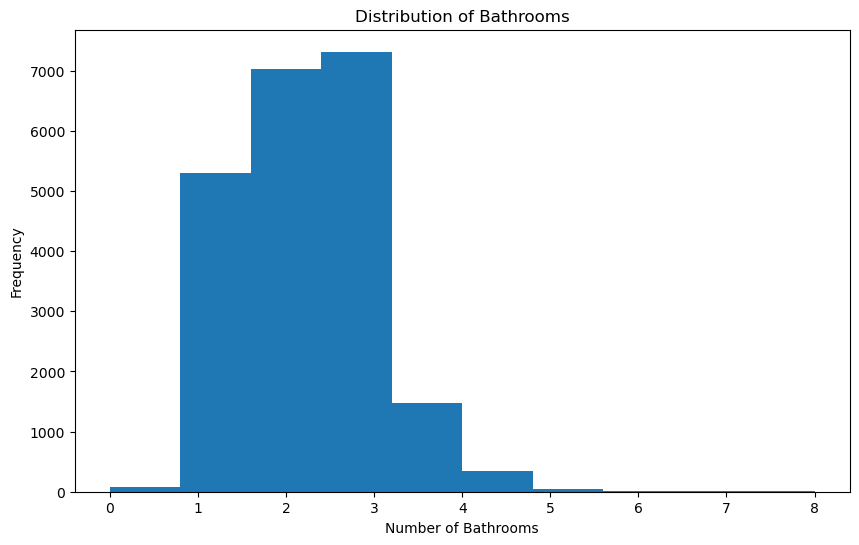

In [ ]:
# Plot distribution of 'price'
plt.figure(figsize=(10, 6))
plt.hist(data['bathrooms'])
plt.title('Distribution of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.show()

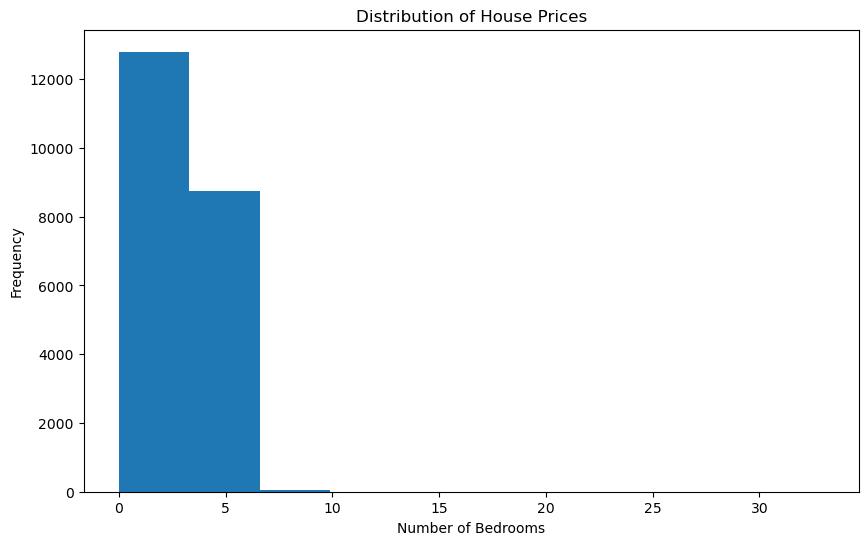

In [ ]:
# Plot distribution of 'price'
plt.figure(figsize=(10, 6))
plt.hist(data['bedrooms'])
plt.title('Distribution of House Prices')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

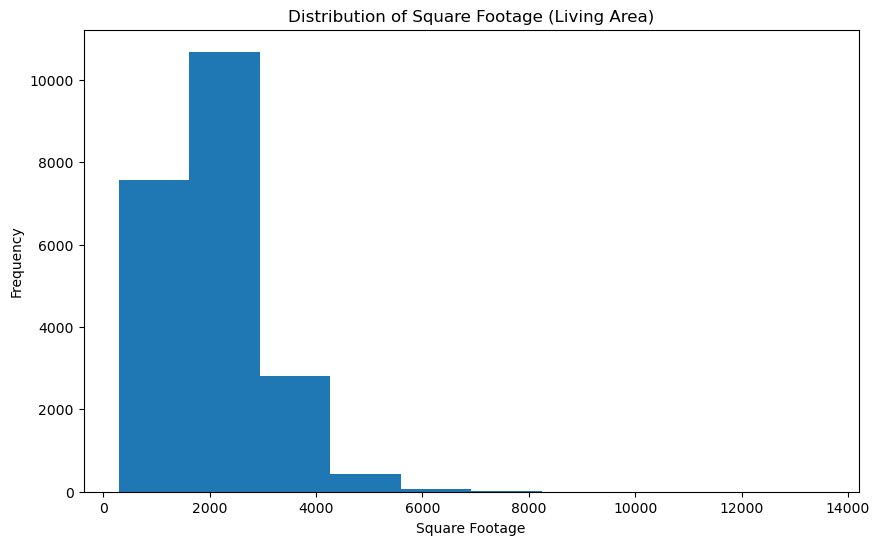

In [ ]:
# Plot distribution of 'Square footage'
plt.figure(figsize=(10, 6))
plt.hist(data['sqft_living'])
plt.title('Distribution of Square Footage (Living Area)')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


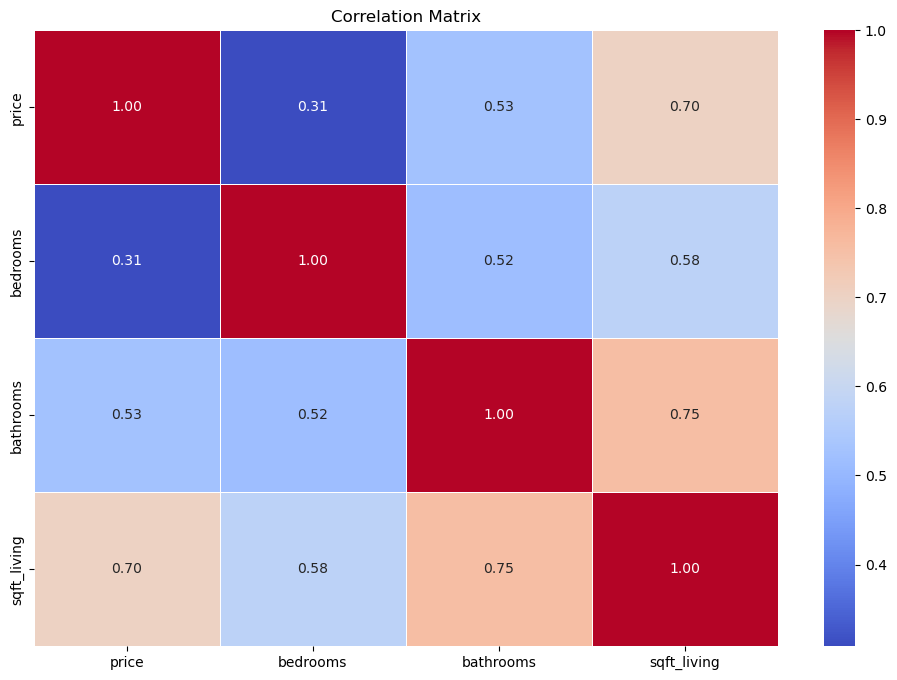

In [ ]:
# Select the relevant columns only for correlation
numeric_data = data[['price', 'bedrooms', 'bathrooms', 'sqft_living']]
# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Summary:
Strong correlations:

Price and sqft_living (0.70): The living area (square footage) is a key factor influencing house price.
Bathrooms and sqft_living (0.75): Larger homes tend to have more bathrooms.
Moderate correlations:

Price and bathrooms (0.53): More bathrooms correlate with higher prices, though not as strongly as square footage.
Bedrooms and sqft_living (0.58): Larger homes tend to have more bedrooms, but the relationship isn't perfect.
Bedrooms and bathrooms (0.52): More bedrooms often correlate with more bathrooms.
Weak correlation:

Price and bedrooms (0.31): The number of bedrooms has a weaker impact on house price compared to other variables like square footage and bathrooms.
Conclusion:
Key predictors for house price: Square footage (sqft_living) and bathrooms are the most important features to consider when predicting house price, as they have the strongest correlations with price.
Bedrooms: While important, the number of bedrooms is a weaker predictor of house price

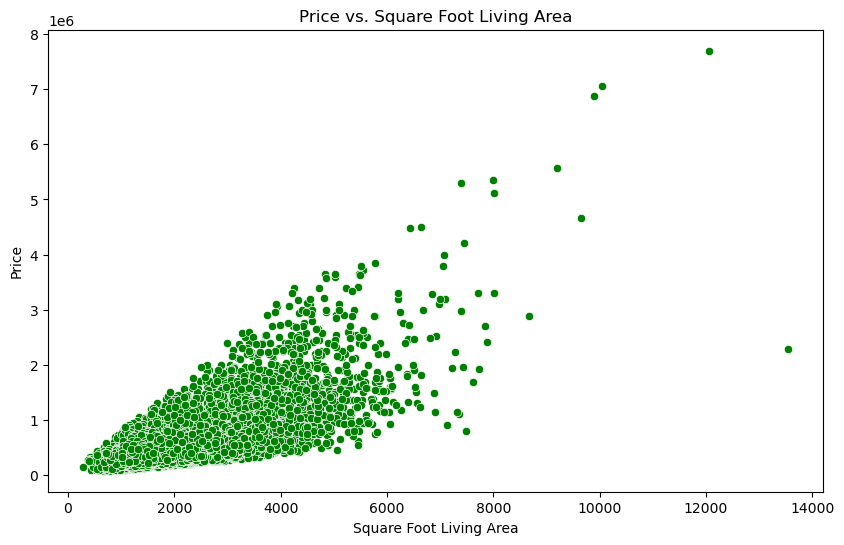

In [ ]:
# Scatter plot between sqft_living and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=data, color='green')
plt.title('Price vs. Square Foot Living Area')
plt.xlabel('Square Foot Living Area')
plt.ylabel('Price')
plt.show()




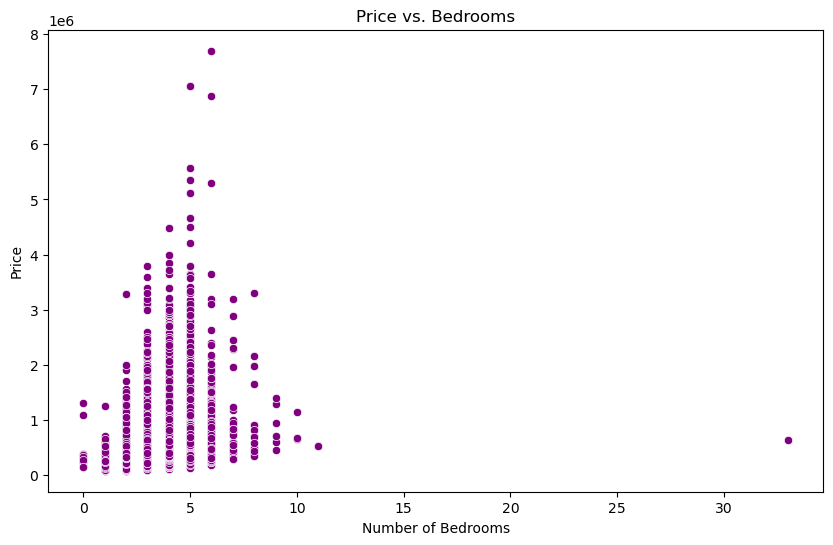

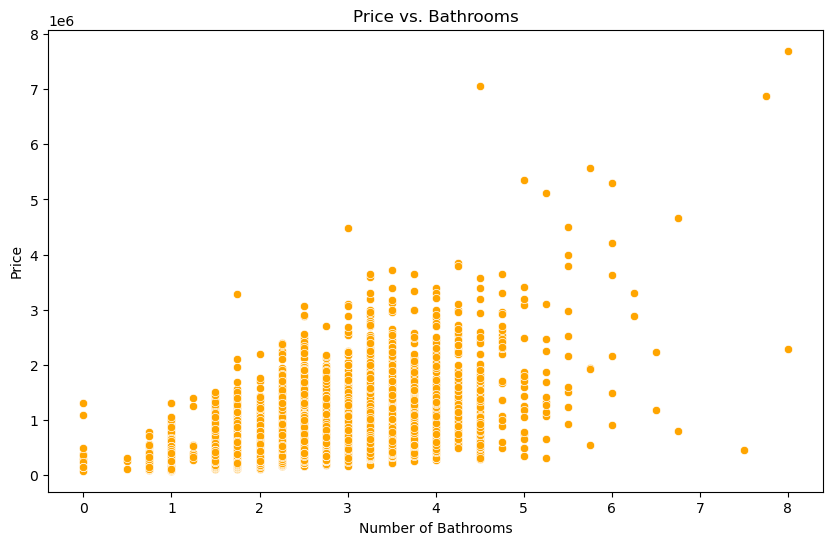

In [ ]:
# Scatter plot between bedrooms and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=data, color='purple')
plt.title('Price vs. Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Scatter plot between bathrooms and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bathrooms', y='price', data=data, color='orange')
plt.title('Price vs. Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

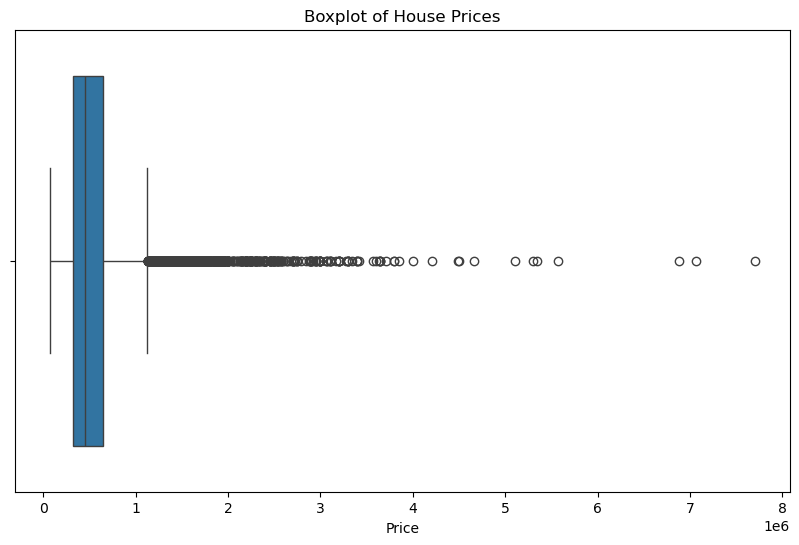

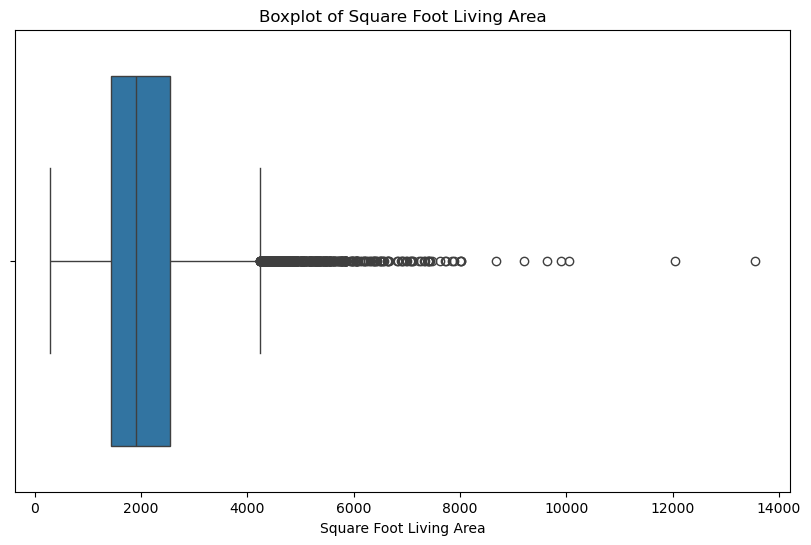

In [ ]:
# Boxplot for price to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=data)
plt.title('Boxplot of House Prices')
plt.xlabel('Price')
plt.show()

# Boxplot for sqft_living to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='sqft_living', data=data)
plt.title('Boxplot of Square Foot Living Area')
plt.xlabel('Square Foot Living Area')
plt.show()

In [ ]:

# Examine whether there is a significant relationship between the number of price and sqft_lot
#step 1: Set the null and alternative hypothesis
h0 = 'There is no significant relationship between price and sqft_lot'
h1 = 'There is a significant relationship between price and sqft_lot'

#Step 2: level of significance
alpha = 0.05

#Calculate Pearson correlation coefficient
corr_coef, p_Value = pearsonr(data['price'], data['sqft_lot'])

#decision rule
if p_Value < alpha:
    print(f'{h1} @ p-value = {p_Value}')
else:
    print(f'{h0} @ p-value = {p_Value}')


There is a significant relationship between price and sqft_lot @ p-value = 7.975320681276266e-40


In [ ]:


# Hypothesis
h0 = 'There is no significant relationship between price and sqft_living'
h1 = 'There is a significant relationship between price and sqft_living'

# Level of significance
alpha = 0.05

# Calculate Pearson correlation coefficient
corr_coef, p_Value = pearsonr(data['price'], data['sqft_living'])

# Decision rule
if p_Value < alpha:
    print(f'{h1} @ p-value = {p_Value}')
else:
    print(f'{h0} @ p-value = {p_Value}')


There is a significant relationship between price and sqft_living @ p-value = 0.0


In [ ]:

# Hypothesis
h0 = 'There is no significant relationship between price and sqft_above'
h1 = 'There is a significant relationship between price and sqft_above'

# Level of significance
alpha = 0.05

# Calculate Pearson correlation coefficient
corr_coef, p_Value = pearsonr(data['price'], data['sqft_above'])

# Decision rule
if p_Value < alpha:
    print(f'{h1} @ p-value = {p_Value}')
else:
    print(f'{h0} @ p-value = {p_Value}')


There is a significant relationship between price and sqft_above @ p-value = 0.0


In [ ]:


# Hypothesis
h0 = 'There is no significant relationship between price and sqft_basement'
h1 = 'There is a significant relationship between price and sqft_basement'

# Level of significance
alpha = 0.05

# Calculate Pearson correlation coefficient
corr_coef, p_Value = pearsonr(data['price'], data['sqft_basement'])

# Decision rule
if p_Value < alpha:
    print(f'{h1} @ p-value = {p_Value}')
else:
    print(f'{h0} @ p-value = {p_Value}')


There is a significant relationship between price and sqft_basement @ p-value = 0.0


In [ ]:

# Hypothesis
h0 = 'There is no significant relationship between price and bathrooms'
h1 = 'There is a significant relationship between price and bathrooms'

# Level of significance
alpha = 0.05

# Calculate Pearson correlation coefficient
corr_coef, p_Value = pearsonr(data['price'], data['bathrooms'])

# Decision rule
if p_Value < alpha:
    print(f'{h1} @ p-value = {p_Value}')
else:
    print(f'{h0} @ p-value = {p_Value}')


There is a significant relationship between price and bathrooms @ p-value = 0.0


In [ ]:

# Hypothesis
h0 = 'There is no significant relationship between price and bedroom'
h1 = 'There is a significant relationship between price and bedroom'

# Level of significance
alpha = 0.05

# Calculate Pearson correlation coefficient
corr_coef, p_Value = pearsonr(data['price'], data['bedrooms'])

# Decision rule
if p_Value < alpha:
    print(f'{h1} @ p-value = {p_Value}')
else:
    print(f'{h0} @ p-value = {p_Value}')


There is a significant relationship between price and bedroom @ p-value = 0.0


In [ ]:
# select the relevant columns for the model
y = data['price']# Target variable
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15','sqft_lot15']]  # Features

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =23, test_size =0.2)

In [ ]:
# intialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

#Make pedictions on the test set
y_pred = model.predict(X_test)

In [ ]:
 # Calculate Mean Absolute Error (MAE)
 mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# calculate the root_mean_squared error
rmse = root_mean_squared_error(y_test, y_pred)
# Calculate R-squared value
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"root_mean_squared_error(rmse) : {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 165005.8258092632
root_mean_squared_error(rmse) : 239061.44452561712
Mean Squared Error (MSE): 57150374258.674706
R-squared: 0.5148266465602803


In [ ]:
# train the model

model = XGBRegressor(random_state = 23, learning_rate= 0.01, max_depth= 5) # init the model
model.fit(X_train, y_train) # fit the model

# getting predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# evaluate the model performance
print(f'rmse_train_score: {mean_squared_error(y_train, train_pred)}')
print(f'rmse_test_score: {mean_squared_error(y_test, test_pred)}')



rmse_train_score: 64995813851.48463
rmse_test_score: 58660451752.30214
